In [ ]:
!pip install shap
!pip install lime

In [ ]:
import tensorflow as tf
import numpy as np
import os
from tensorflow import keras
import pandas as pd
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPool2D, MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from tensorflow.keras import backend as K
import itertools
import seaborn as sns
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from sklearn import preprocessing

##from tensorflow.keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import accuracy_score

In [ ]:
# filter warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('cm1 (3).csv', delimiter=',')
y = df.defects.copy()
X = df.drop(['defects'],axis=1)

print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 21)

print(X_train.shape)
print(X_test.shape)
print(X_test.iloc[0])
print(y_train.shape)

   McCabe's line count of code  McCabe "cyclomatic complexity”  \
0                          1.1                             1.4   
1                          1.0                             1.0   
2                         24.0                             5.0   
3                         20.0                             4.0   
4                         24.0                             6.0   

   McCabe "essential complexity”  McCabe "design complexity”  \
0                            1.4                         1.4   
1                            1.0                         1.0   
2                            1.0                         3.0   
3                            4.0                         2.0   
4                            6.0                         2.0   

   Halstead total operators + operands  Halstead "volume”  \
0                                  1.3               1.30   
1                                  1.0               1.00   
2                                 6

In [ ]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units =64 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))
classifier.add(Dropout(rate = 0.25))
# Adding the second hidden layer
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.25))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the third hidden layer
classifier.add(Dense(units = 256, kernel_initializer = 'uniform',kernel_regularizer=regularizers.l2(0.02), activation = 'relu'))

classifier.add(Dense(units = 256, kernel_initializer = 'uniform', kernel_regularizer=regularizers.l2(0.02), activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
optimizer=keras.optimizers. Adam(lr=0.00001)
classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()
# Fitting the DNN to the Training set
classifier.fit(X_train, y_train,epochs =1000, verbose=0)

score, acc = classifier.evaluate(X_train, y_train)
print('Train score:', score)
print('Train accuracy:', acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 256)               6

6/6 [==============================] - 0s 3ms/step
********************
6/6 [==============================] - 0s 3ms/step - loss: 5.4030 - accuracy: 0.9152
Test score: 5.402985572814941
Test accuracy: 0.9151515364646912
[[147   5]
 [  9   4]]


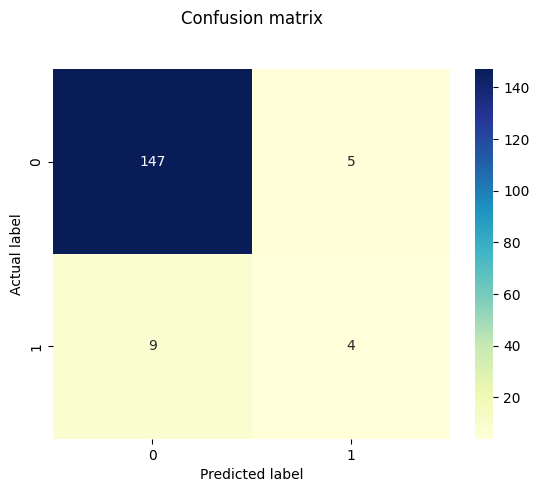

In [ ]:
# Part 3 - Making predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)
cm = confusion_matrix(y_test, y_pred)
print(cm)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

       False       0.94      0.97      0.95       152
        True       0.44      0.31      0.36        13

    accuracy                           0.92       165
   macro avg       0.69      0.64      0.66       165
weighted avg       0.90      0.92      0.91       165

6/6 [==============================] - 0s 3ms/step - loss: 5.4030 - accuracy: 0.9152
False Positive Rates : [0.         0.03289474 1.        ]
True  Positive Rates : [0.         0.30769231 1.        ]
Threshols            : [2 1 0]
Accuracy             : [5.402985572814941, 0.9151515364646912]
AUC                  : 0.6373987854251012


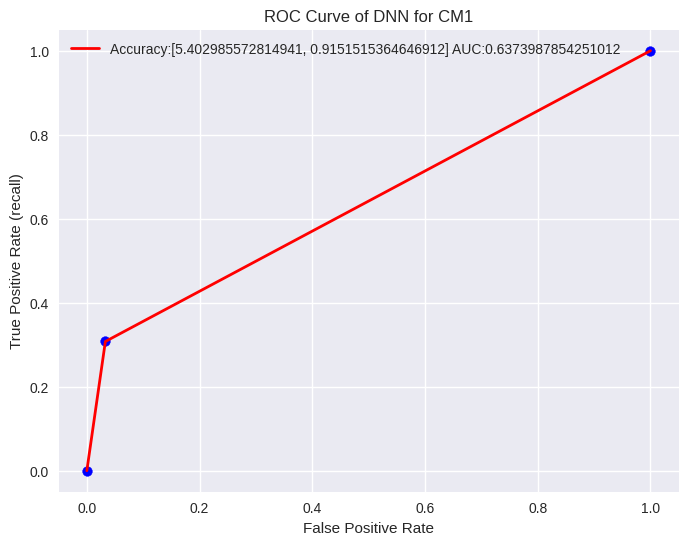

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_curve, roc_auc_score

#fpr, tpr, thresholds = roc_curve(Y_test, log_reg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

#auc = roc_auc_score(Y_test, log_reg.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)

acc1 = classifier.evaluate(X_test, y_test)

print("False Positive Rates : {}".format(fpr))
print("True  Positive Rates : {}".format(tpr))
print("Threshols            : {}".format(thresholds))
print("Accuracy             : {}".format(acc1))
print("AUC                  : {}".format(auc))
with plt.style.context(('ggplot','seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(fpr, tpr, c='blue')
    plt.plot(fpr, tpr, label="Accuracy:{} AUC:{}".format((acc1), (auc)), linewidth=2, c='red')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (recall)")
    plt.title('ROC Curve of DNN for CM1')
    plt.legend(loc='best');
    plt.show()

In [ ]:
print("------------Classifier Prediction (Test Set)--------------------------")
print(classifier.predict(X_test))
df2=pd.DataFrame(classifier.predict(X_test))
df2.to_csv('classifierPrediction_CM1.csv')
print("------------------------------------------------------------")
#Area under ROC curve
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))
from sklearn.metrics import log_loss

print('Test Log Loss   : %.3f'%log_loss(y_test, classifier.predict(X_test)))
print('Train Log Loss  : %.3f'%log_loss(y_train, classifier.predict(X_train)))


------------Classifier Prediction (Test Set)--------------------------
6/6 [==============================] - 0s 2ms/step
[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [2.09761347e-05]
 [1.27707198e-02]
 [2.98536186e-27]
 [7.05987986e-05]
 [8.69605422e-01]
 [1.21332752e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [4.12753914e-10]
 [0.00000000e+00]
 [1.08828078e-10]
 [5.80506821e-05]
 [2.56417994e-03]
 [1.27262323e-13]
 [2.11515021e-31]
 [6.69339340e-34]
 [8.69605422e-01]
 [1.06694193e-11]
 [1.40112283e-35]
 [5.80506821e-05]
 [1.66226338e-04]
 [0.00000000e+00]
 [1.70998095e-18]
 [5.27795255e-02]
 [3.41633028e-34]
 [0.00000000e+00]
 [5.45184388e-14]
 [0.00000000e+00]
 [1.21125896e-02]
 [8.69605422e-01]
 [8.69605422e-01]
 [6.62584224e-12]
 [6.59136788e-07]
 [2.52949994e-09]
 [2.07111823e-37]
 [5.71976928e-03]
 [4.87590637e-35]
 [4.49161269e-02]
 [9.03528028e-31]
 [1.75415084e-06]
 [2.50007130e-18]
 [4.54077574e-11]
 [4.82022870e-06]
 [1.10712786e-10]
 [3.30791311e-

In [ ]:
X_train= pd.DataFrame(X_test, columns =  ["McCabe's line count of code",
 'McCabe "cyclomatic complexity”',
 'McCabe "essential complexity”',
 'McCabe "design complexity”',
 'Halstead total operators + operands',
 'Halstead "volume”',
 'Halstead "program length”',
 'Halstead "difficulty”',
 'Halstead "intelligence”',
 'Halstead "effort”',
 'Halstead',
 "Halstead's time estimator",
 "Halstead's line count",
 "Halstead's count of lines of comments",
 "Halstead's count of blank",
 'lineslOCodeAndComment',
 'unique operators',
 'unique operands',
 'total operators',
 'total operands',
 'branchCount of the flow graph'
 ])
X_train = X_train.to_numpy()
##X_test = X_test.to_numpy()
explainer = shap.DeepExplainer(classifier,X_train)
shap_values = explainer.shap_values(X_test)
##shap_values = np.array(shap_values)
#shap_values = shap_values.reshape(-1, X_test.shape[1])
##shap_values = shap_values[0].reshape((shap_values[0].shape[0], -1))

print(shap_values)
print(shap_values[:5])
df1= pd.DataFrame(np.concatenate(shap_values))
print(df1)
df1.to_csv('shapcm1.csv')
# Print the base value
print('--------------------BASE VALUE--------------------')
print(explainer.expected_value[0])
print('---------------------------------------------------')
#X_test=pd.DataFrame(X_test, columns = ['Branh Count', 'Call Pairs', 'Condition Count', 'Cyclomatic  Complexity', 'Cyclomatic Density', 'Decision Count', 'Decision Density', 'Decision Complexity', 'Design Desity', 'Edge Count', 'Essential Complexity', 'Essential Density', 'LOC executable', 'Parameter Count', 'Halstead content', 'Halstead Difficulty', 'Halstead Effort', 'Halstead error', 'Halstead Length', 'Halstead Level', 'Halstead Time', 'Halstead Volume', 'Maintenance Severity', 'Modified Condition Count', 'Multiple Condition Count', 'Node Count', 'Normalized Cyclomatic Complexity', 'No. of operands', 'No. of operators', 'Unique operands', 'Unique operators', 'No. of Lines', 'Loc Total'])
X_test=pd.DataFrame(X_test, columns =  ["McCabe's line count of code",
 'McCabe "cyclomatic complexity”',
 'McCabe "essential complexity”',
 'McCabe "design complexity”',
 'Halstead total operators + operands',
 'Halstead "volume”',
 'Halstead "program length”',
 'Halstead "difficulty”',
 'Halstead "intelligence”',
 'Halstead "effort”',
 'Halstead',
 "Halstead's time estimator",
 "Halstead's line count",
 "Halstead's count of lines of comments",
 "Halstead's count of blank",
 'lineslOCodeAndComment',
 'unique operators',
 'unique operands',
 'total operators',
 'total operands',
 'branchCount of the flow graph'
 ])
X_test = X_test.to_numpy()
y_test=pd.DataFrame(y_test, columns=['0', '1'])
feature_names = ["McCabe's line count of code",
 'McCabe "cyclomatic complexity”',
 'McCabe "essential complexity”',
 'McCabe "design complexity”',
 'Halstead total operators + operands',
 'Halstead "volume”',
 'Halstead "program length”',
 'Halstead "difficulty”',
 'Halstead "intelligence”',
 'Halstead "effort”',
 'Halstead',
 "Halstead's time estimator",
 "Halstead's line count",
 "Halstead's count of lines of comments",
 "Halstead's count of blank",
 'lineslOCodeAndComment',
 'unique operators',
 'unique operands',
 'total operators',
 'total operands',
 'branchCount of the flow graph'
 ]
class_names = ['0', '1']
shap.initjs()

[array([[-9.01879156e-03,  3.11120074e-03,  2.55415018e-03, ...,
        -8.52052020e-04, -9.20694266e-05,  4.62241465e-03],
       [ 5.89267196e-03, -2.76759041e-02, -1.44132806e-02, ...,
        -1.86189174e-03, -3.22742876e-03, -3.95465708e-02],
       [-4.09983919e-03, -3.67350886e-03, -3.64935876e-03, ...,
        -3.82008847e-04, -4.90563637e-04, -5.66557898e-03],
       ...,
       [-2.53241505e-03,  1.54653154e-03, -1.00058234e-02, ...,
        -6.72625023e-03,  4.29733955e-03,  2.37730664e-03],
       [ 2.25696715e-03, -2.31323754e-02,  9.00986617e-02, ...,
         1.30025429e-02,  1.82151628e-03, -3.38262026e-02],
       [-7.94466413e-03,  4.04795580e-04, -3.50438866e-03, ...,
         5.02612190e-04, -3.49462366e-05,  4.39944597e-04]])]
[array([[-9.01879156e-03,  3.11120074e-03,  2.55415018e-03, ...,
        -8.52052020e-04, -9.20694266e-05,  4.62241465e-03],
       [ 5.89267196e-03, -2.76759041e-02, -1.44132806e-02, ...,
        -1.86189174e-03, -3.22742876e-03, -3.9546570

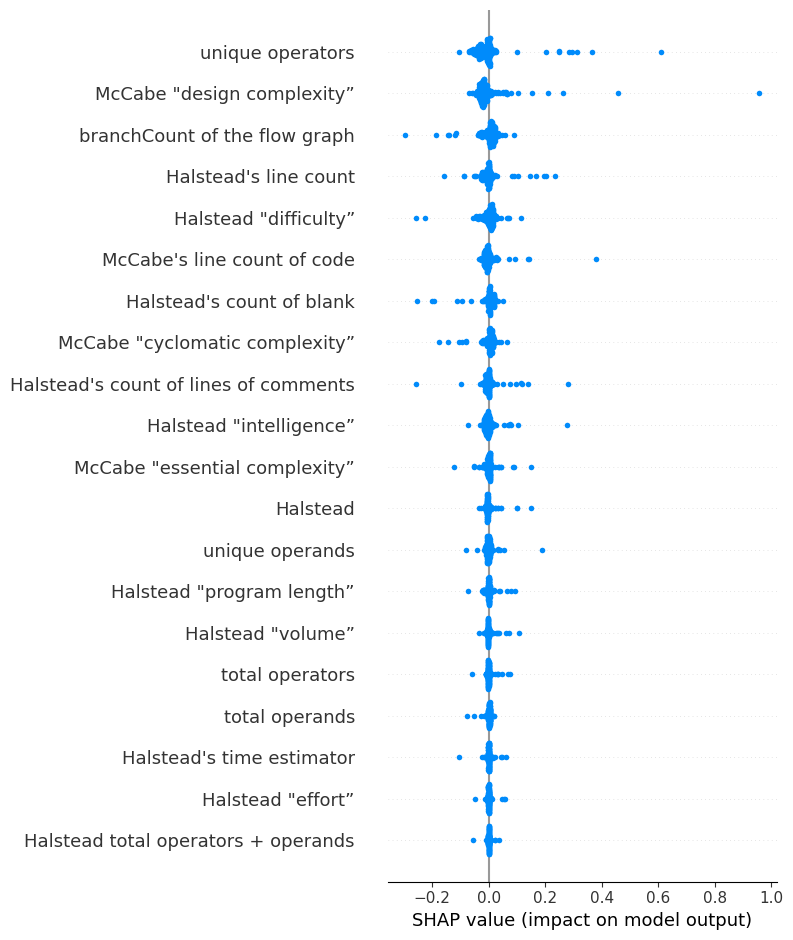

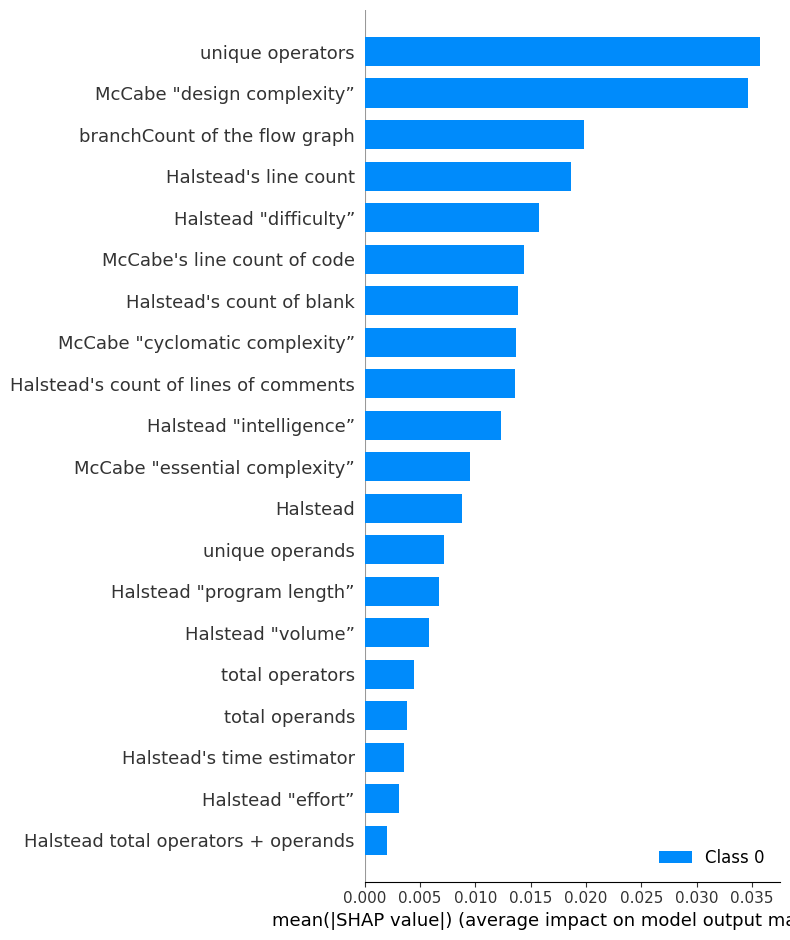

TypeError: ignored

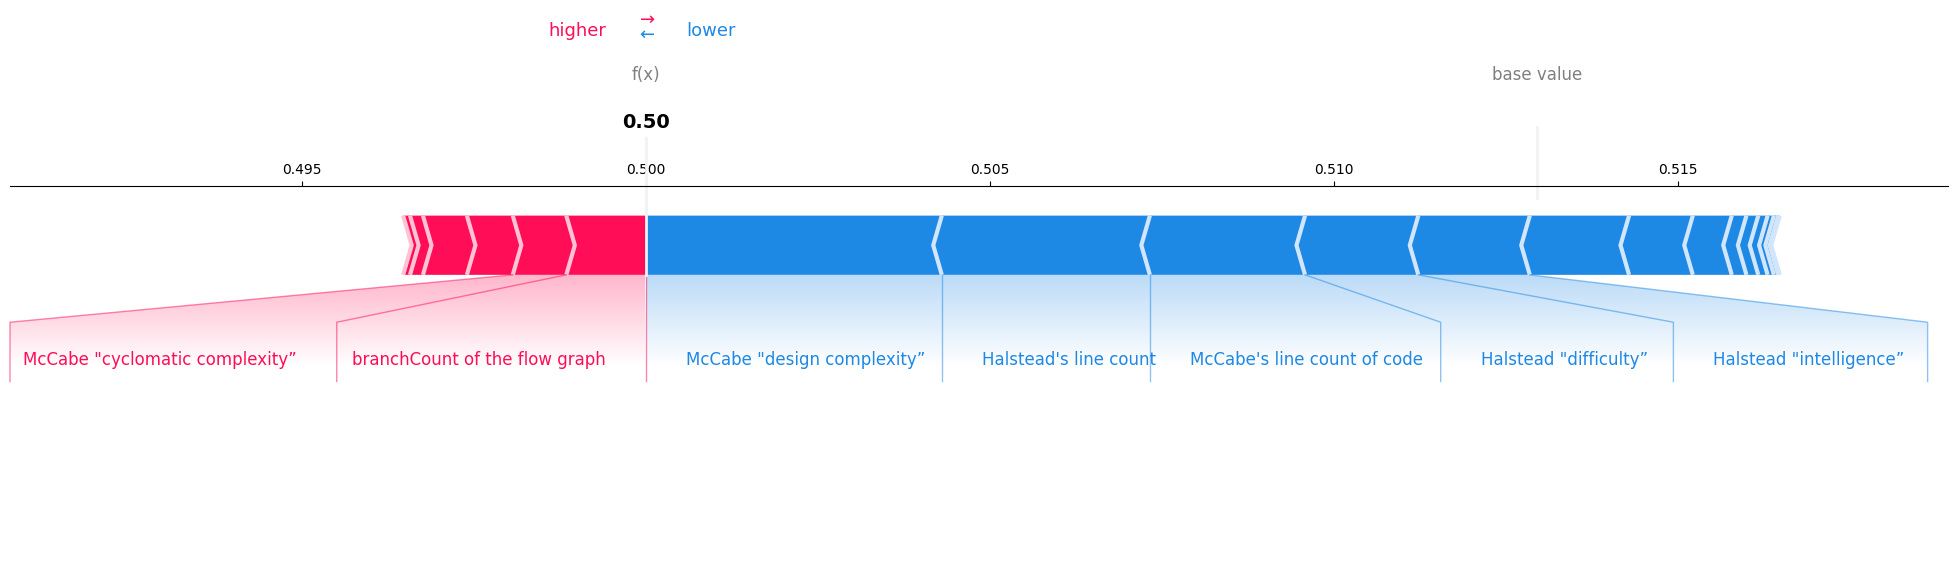

In [ ]:
##shap.summary_plot(shap_values[0],class_names=y_test.columns.tolist(), feature_names = X_test.columns,  show=True, plot_size='auto', alpha=1) # For the first observation
shap.summary_plot(shap_values[0], class_names=class_names, feature_names=feature_names, show=True, plot_size='auto', alpha=1)
shap.summary_plot(shap_values, X_test, feature_names = feature_names  )
shap.force_plot(explainer.expected_value[0], shap_values[0][0], features = feature_names, show=False, figsize=(25, 5), matplotlib=True, link="logit")
plt.savefig('forceplotOBS1.png')

##shap_values = np.array(shap_values)

##shap.decision_plot(explainer.expected_value[0], shap_values[0][0], features = X_test[0].values, feature_names = feature_names)
from shap.plots import *
##shap.waterfall_plot(explainer.expected_value[0], shap_values[0][0], feature_names = feature_names )
##shap.waterfall_plot(explainer.expected_value[0], shap_values[0][0] )
##shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:],show=False, figsize=(20, 4), matplotlib=True, link="logit")
plt.savefig('forceplotOBS2.png')
p = shap.force_plot(explainer.expected_value[0], shap_values[0], X_test,link="logit")
shap.save_html('CM1forceplot.html', p)
shap.dependence_plot('Call Pairs', shap_values[0], X_test)
shap.summary_plot(shap_values, X_test, class_names= df.defects,feature_names = X_test.columns)
